In [1]:
import pandas as pd
from info_gain import info_gain

# ── Load your data ──────────────────────────────────────────────────────────
# Replace the path below with the actual path to your exported CSV file
df = pd.read_csv('/Users/adityagarg/Documents/11th Grade/(H) Data Analytics/Unit_6_Project/training_data.csv')

print('Shape:', df.shape)
df.head()

Shape: (90, 5)


,Categorical_Sepal_Length_Feature1,Categorical_Petal_Length_Feature2,Categorical_Petal_Width_Feature3,Type_of_Flower_Target,Random_Assigned_Number
0,Large_Sepal_Length,Medium_Petal_Length,Medium_Petal_Width,Iris-versicolor,0.001177
1,Medium_Sepal_Length,Medium_Petal_Length,Small_Petal_Width,Iris-versicolor,0.004767
2,Medium_Sepal_Length,Large_Petal_Length,Large_Petal_Width,Iris-virginica,0.005255
3,Medium_Sepal_Length,Medium_Petal_Length,Medium_Petal_Width,Iris-versicolor,0.008004
4,Medium_Sepal_Length,Medium_Petal_Length,Medium_Petal_Width,Iris-versicolor,0.025458


In [2]:
# Define features and target
features = [
    'Categorical_Sepal_Length_Feature1',
    'Categorical_Petal_Length_Feature2',
    'Categorical_Petal_Width_Feature3'
]
target = 'Type_of_Flower_Target'

# Calculate information gain for each feature
results = {}
for feature in features:
    ig = info_gain.info_gain(df[feature], df[target])
    results[feature] = ig
    print(f'{feature}: {ig:.6f}')

Categorical_Sepal_Length_Feature1: 0.369393
Categorical_Petal_Length_Feature2: 0.711735
Categorical_Petal_Width_Feature3: 0.598801


In [3]:
# Summary
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Information_Gain'])
results_df = results_df.sort_values('Information_Gain', ascending=False)
results_df['Rank'] = range(1, len(results_df) + 1)

print('\n=== Information Gain Summary ===')
print(results_df.to_string())

best_feature = results_df.index[0]
print(f'\n✅ Best root node feature: {best_feature}')
print(f'   Information Gain: {results_df.loc[best_feature, "Information_Gain"]:.6f}')


=== Information Gain Summary ===
                                   Information_Gain  Rank
Categorical_Petal_Length_Feature2          0.711735     1
Categorical_Petal_Width_Feature3           0.598801     2
Categorical_Sepal_Length_Feature1          0.369393     3

✅ Best root node feature: Categorical_Petal_Length_Feature2
   Information Gain: 0.711735


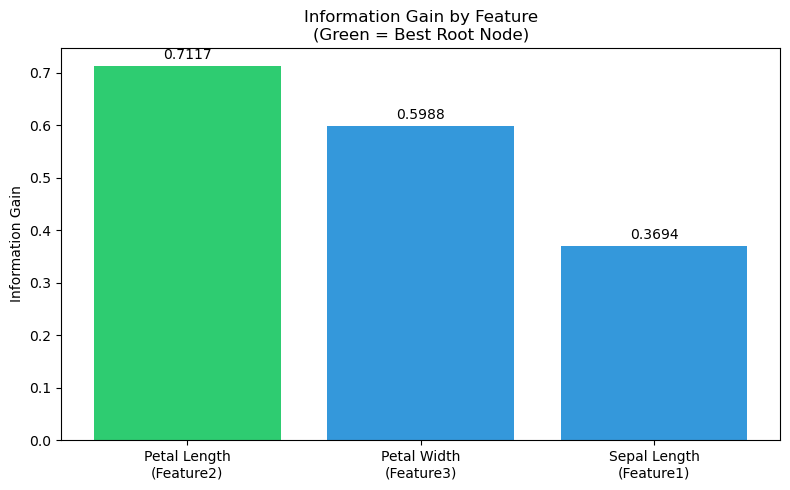

In [4]:
# Optional: bar chart visualization
import matplotlib.pyplot as plt

# Shorten labels for readability
short_labels = [
    'Sepal Length\n(Feature1)',
    'Petal Length\n(Feature2)',
    'Petal Width\n(Feature3)'
]
label_map = dict(zip(features, short_labels))

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(
    [label_map[f] for f in results_df.index],
    results_df['Information_Gain'],
    color=['#2ecc71' if i == 0 else '#3498db' for i in range(len(results_df))]
)
ax.set_ylabel('Information Gain')
ax.set_title('Information Gain by Feature\n(Green = Best Root Node)')
ax.bar_label(bars, fmt='%.4f', padding=3)
plt.tight_layout()
plt.show()